# MLSES Seminar 23: Solar Thermal System: Results and Visualization

In [24]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from tueplots import bundles

plt.rcParams.update(bundles.beamer_moml())

MODEL_DIR = '../models/'
MODEL_NAME = 'model'
CIRCUITS = {0: 'solar', 1: 'water', 2: 'boiler', 3: 'heating'}
QUANTITIES = {'vf': ("Volume flow rate", "l/h"), 'qth': ("Heat transfer", "kWh")}
DATA_TYPES = {'target': "Ground-truth", 'pred': "Prediction"}
TIMESTEP = 5
HOUR_FORECAST_HORIZON = 720

In [29]:
def load_and_plot_results(task_name: str) -> None:
    fig, axs = plt.subplots(len(CIRCUITS), len(QUANTITIES), figsize=(15, 10))
    
    for col, (k1, (v1a, v1b)) in enumerate(QUANTITIES.items()):
        for k2, v2 in DATA_TYPES.items():
            # load data from disk
            data_path = Path(MODEL_DIR).joinpath(f'{task_name}_{MODEL_NAME}_{k1}_{k2}.npy')
            data = np.load(data_path)
            T = np.arange(0, data.shape[0] * TIMESTEP, TIMESTEP)
            
            if task_name == 'forecast_hour':
                # only keep subsequent hourly predictions
                data = data.reshape((-1, HOUR_FORECAST_HORIZON, len(CIRCUITS)))
                data = data[::HOUR_FORECAST_HORIZON].reshape((-1, len(CIRCUITS)))[:data.shape[0]]
            
            for row, (k3, v3) in enumerate(CIRCUITS.items()):
                # plot data
                axs[row, col].plot(T, data[:, k3], label=v2)
                axs[row, col].title.set_text(f"{v1a} ({v3})")
                axs[row, col].set_xlabel("s")
                axs[row, col].set_ylabel(v1b)
                axs[row, col].legend()

## Approximation Task:

### Configuration:

```bash
python main.py --task approximation --random-split --window-size 1
```

### Results on test data:

```
Approximation Task: RMSE (VF_solar) = 51.17305
Approximation Task: MAE (VF_solar) = 21.89137
Approximation Task: RMSE (Qth_solar) = 419.16355
Approximation Task: MAE (Qth_solar) = 179.31439
Approximation Task: RMSE (VF_water) = 47.17853
Approximation Task: MAE (VF_water) = 16.08495
Approximation Task: RMSE (Qth_water) = 386.44676
Approximation Task: MAE (Qth_water) = 131.75431
Approximation Task: RMSE (VF_boiler) = 258.67247
Approximation Task: MAE (VF_boiler) = 187.18223
Approximation Task: RMSE (Qth_boiler) = 2118.81507
Approximation Task: MAE (Qth_boiler) = 1533.23112
Approximation Task: RMSE (VF_heating) = 213.57654
Approximation Task: MAE (VF_heating) = 181.27584
Approximation Task: RMSE (Qth_heating) = 1749.43164
Approximation Task: MAE (Qth_heating) = 1484.85255
Approximation Task: RMSE (VF_total) = 171.29717
Approximation Task: MAE (VF_total) = 101.60860
Approximation Task: RMSE (Qth_total) = 1403.11506
Approximation Task: MAE (Qth_total) = 832.28809
```

### Visualization (first 50k predictions on test data):

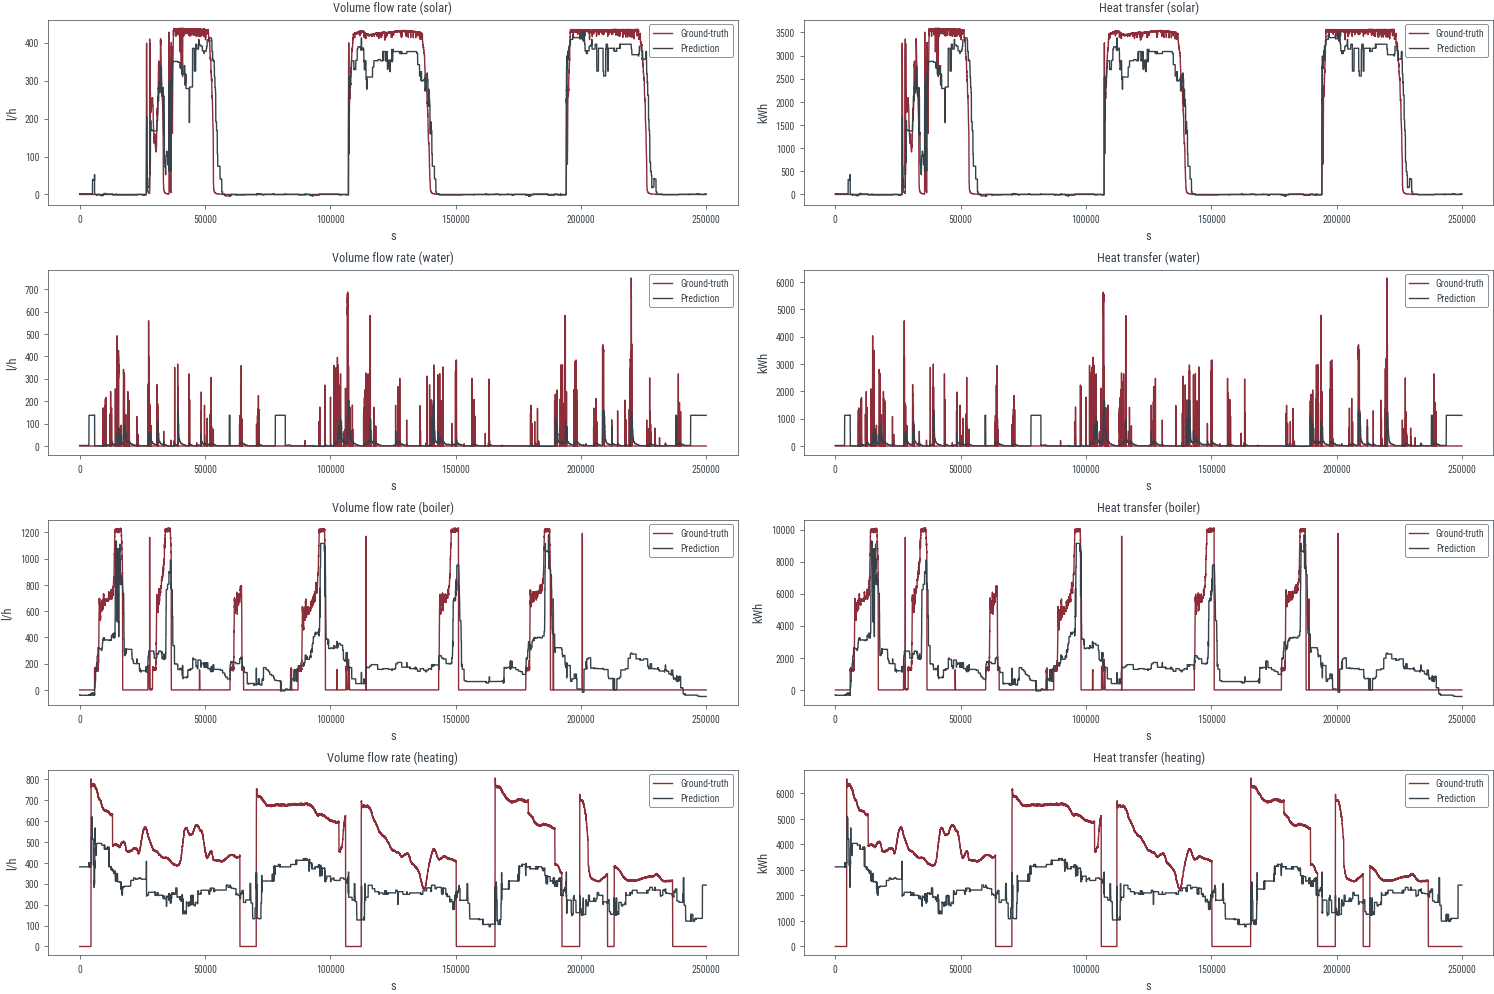

In [30]:
load_and_plot_results('approximation')

### Discussion:

In general, the qualitative shape of the ground-truth curves is captured by the model's predictions.

Predictions are particularly good for the 'solar' circuit.

For the other circuits, in particular the 'water' circuit, it seems like the model is not able to capture the high frequencies of the signal.

Concerning the 'heating' circuit, results are worst, with the predicted time series missing large amplitudes at all.

---

## Step Forecast Task:

### Configuration:

```bash
python main.py --task forecast_step --window-size 5
```

### Results on test data:

```
Forecast_step Task: RMSE (VF_solar) = 14.27258
Forecast_step Task: MAE (VF_solar) = 12.94418
Forecast_step Task: RMSE (Qth_solar) = 24.04837
Forecast_step Task: MAE (Qth_solar) = 3.90629
Forecast_step Task: RMSE (VF_water) = 3.42316
Forecast_step Task: MAE (VF_water) = 2.69039
Forecast_step Task: RMSE (Qth_water) = 90.01935
Forecast_step Task: MAE (Qth_water) = 14.44275
Forecast_step Task: RMSE (VF_boiler) = 0.23686
Forecast_step Task: MAE (VF_boiler) = 0.14311
Forecast_step Task: RMSE (Qth_boiler) = 78.30330
Forecast_step Task: MAE (Qth_boiler) = 17.18964
Forecast_step Task: RMSE (VF_heating) = 8.08113
Forecast_step Task: MAE (VF_heating) = 6.75409
Forecast_step Task: RMSE (Qth_heating) = 36.94438
Forecast_step Task: MAE (Qth_heating) = 17.22809
Forecast_step Task: RMSE (VF_total) = 9.85822
Forecast_step Task: MAE (VF_total) = 5.78839
Forecast_step Task: RMSE (Qth_total) = 63.59658
Forecast_step Task: MAE (Qth_total) = 13.19169
```

### Visualization (first 50k predictions on test data):

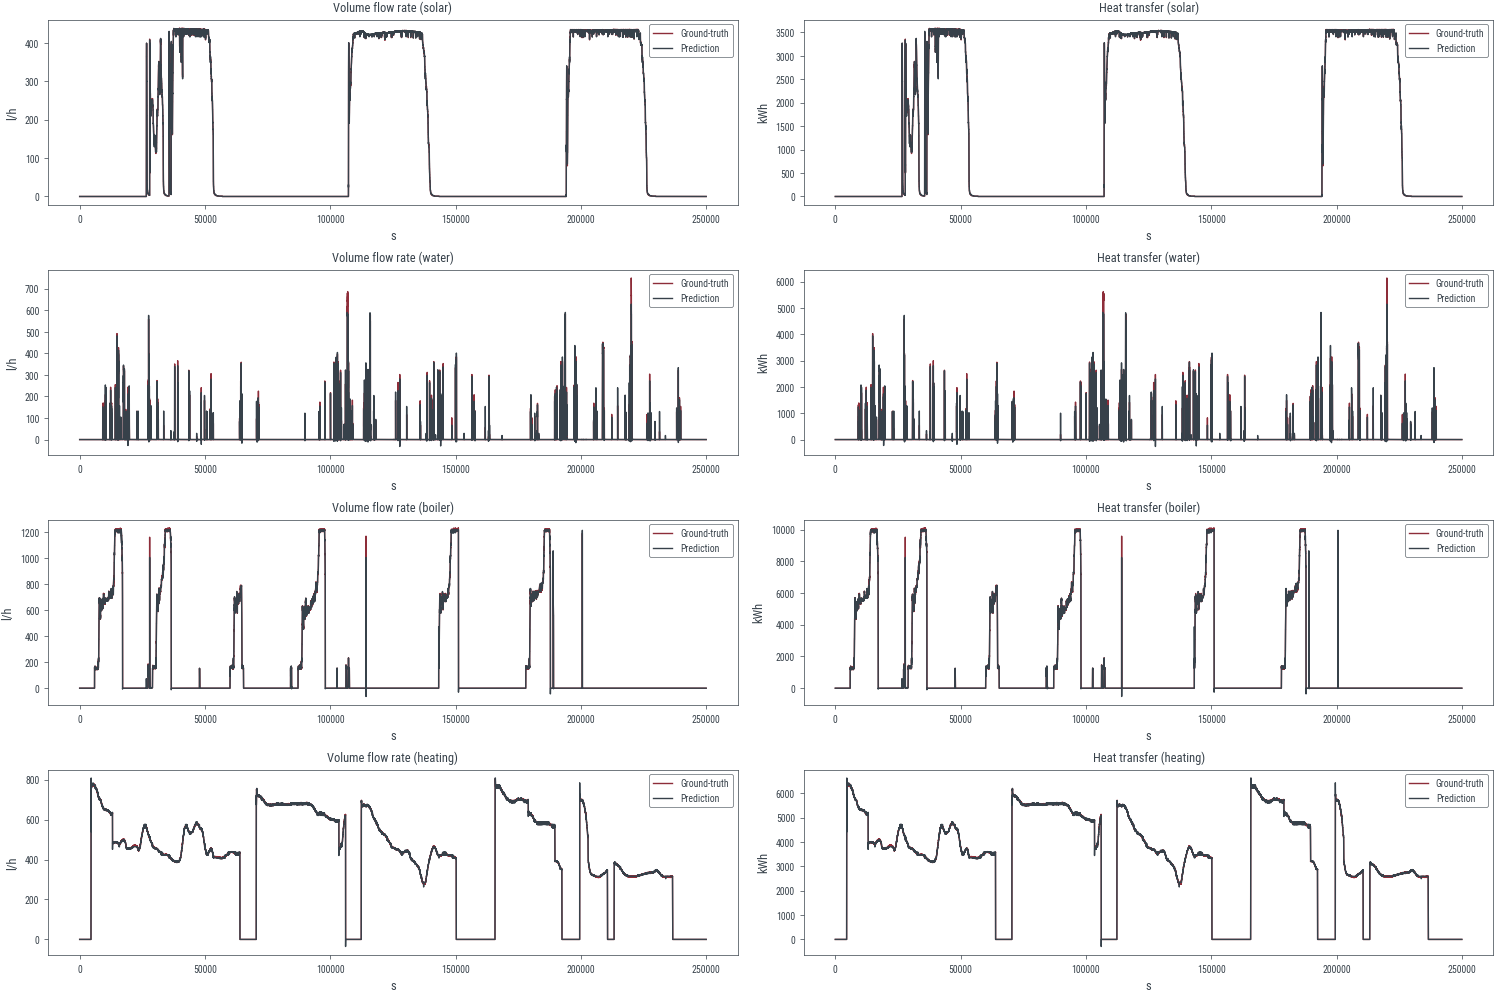

In [31]:
load_and_plot_results('forecast_step')

### Discussion:

The overall discrepancy between ground truth and predictions is very small.

This is not surprising, as the model only had to predict the next timestep, given the (correct) current one, so potential errors do not accumulate over time.

---

## Hour Forecast Task:

### Configuration:

```bash
python main.py --task forecast_hour --window-size 5 --horizon-partition-size 5
```

### Results on test data:

```
Forecast_hour Task: RMSE (VF_solar) = 128.04581
Forecast_hour Task: MAE (VF_solar) = 57.82919
Forecast_hour Task: RMSE (Qth_solar) = 1048.83716
Forecast_hour Task: MAE (Qth_solar) = 473.68522
Forecast_hour Task: RMSE (VF_water) = 46.62938
Forecast_hour Task: MAE (VF_water) = 30.39444
Forecast_hour Task: RMSE (Qth_water) = 381.94870
Forecast_hour Task: MAE (Qth_water) = 248.96515
Forecast_hour Task: RMSE (VF_boiler) = 374.73742
Forecast_hour Task: MAE (VF_boiler) = 205.04715
Forecast_hour Task: RMSE (Qth_boiler) = 3069.51475
Forecast_hour Task: MAE (Qth_boiler) = 1679.56526
Forecast_hour Task: RMSE (VF_heating) = 295.73747
Forecast_hour Task: MAE (VF_heating) = 183.65686
Forecast_hour Task: RMSE (Qth_heating) = 2422.41985
Forecast_hour Task: MAE (Qth_heating) = 1504.35396
Forecast_hour Task: RMSE (VF_total) = 248.72072
Forecast_hour Task: MAE (VF_total) = 120.33562
Forecast_hour Task: RMSE (Qth_total) = 2037.29926
Forecast_hour Task: MAE (Qth_total) = 985.68307
```

### Visualization (first 50k predictions on test data):

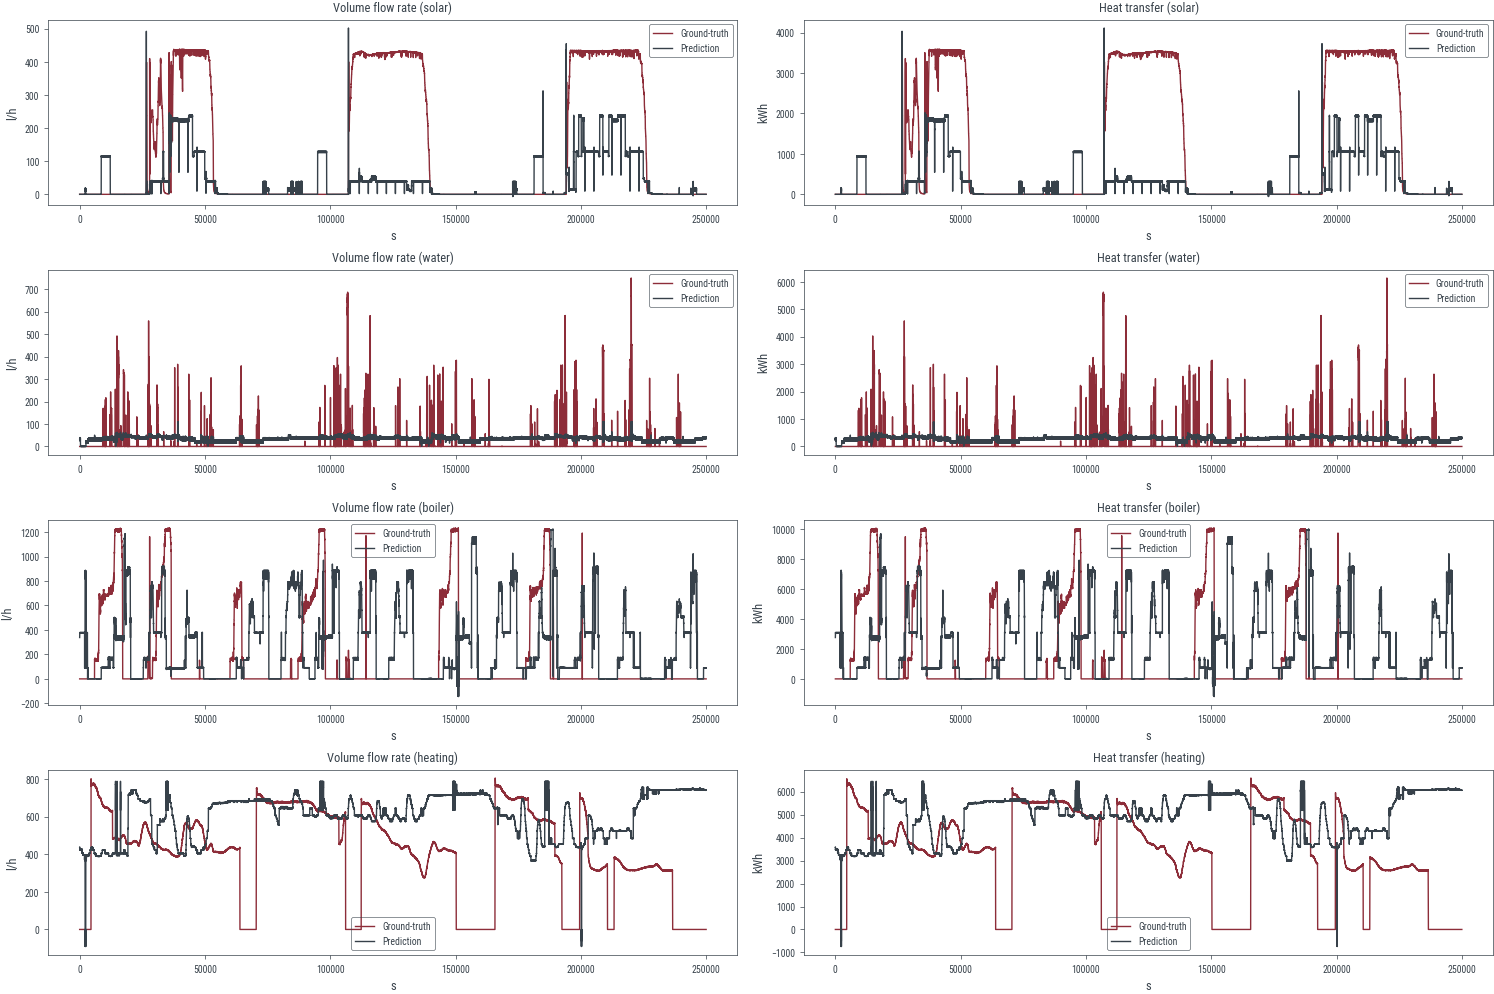

In [32]:
load_and_plot_results('forecast_hour')

### Discussion:

It looks like the model is capable to capture some variations of the signal.

However, there is often a delay, and full amplitudes are not reached.

For the 'water' and 'heating' circuits, model predictions are rather insufficient.